## Double integrator

Converged with determinedness index 1.



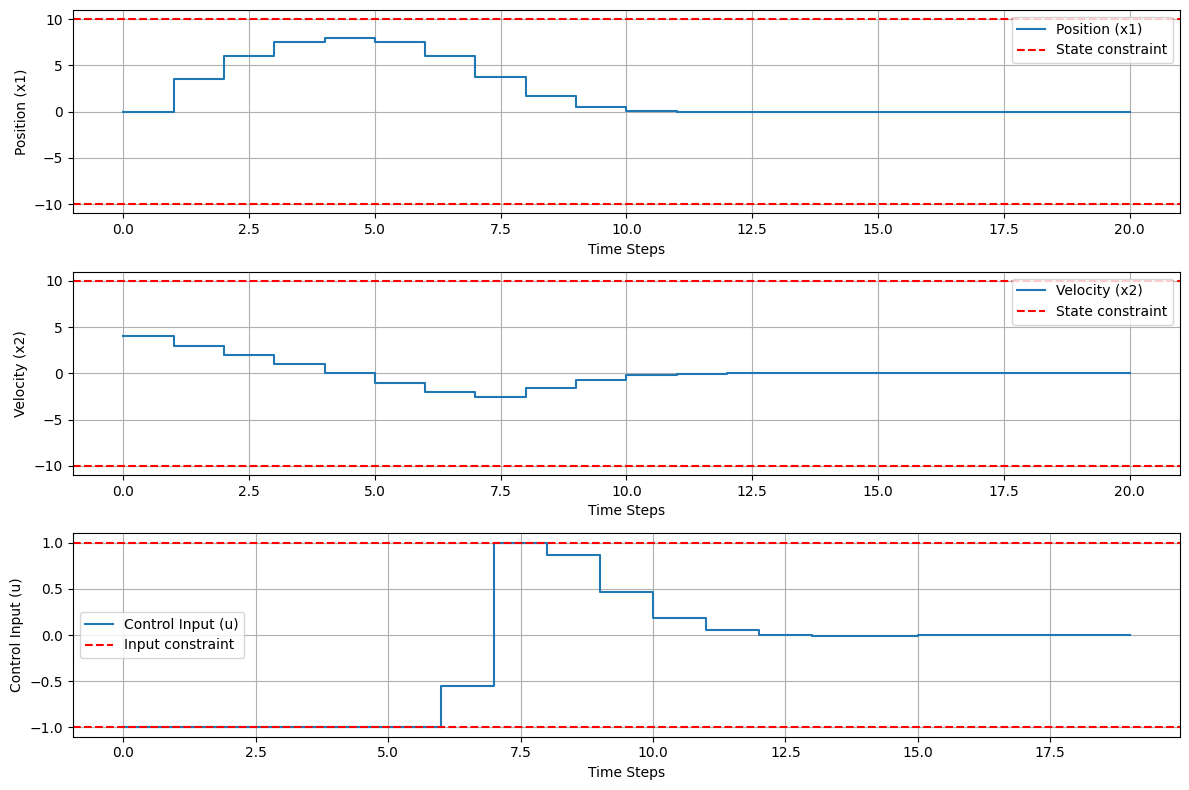

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control

from LinearMPC import MPCParameters, MPC


# Define the discrete-time double integrator system directly
A = np.array([[1, 1], [0, 1]])
B = np.array([[0.5], [1]])

# Create the state-space system
sys_disc = control.ss(A, B, np.eye(2), np.zeros((2, 1)))

# Define the cost matrices
Q = np.eye(2)  # State penalty
R = np.array([[1]])  # Input penalty
T = 20  # Prediction horizon

# Create the MPC parameters object
mpc_params = MPCParameters(system=sys_disc, horizon=T, Q=Q, R=R)

# Add state constraints (infinity norm ball of radius 10 for both states)
mpc_params.add_state_magnitude_constraint(limit=10)

# Add input constraint (magnitude less than 1 for the input)
mpc_params.add_input_magnitude_constraint(limit=1)

# Add terminal ingredients
mpc_params.add_terminal_ingredients()

# Create the MPC object
mpc = MPC(mpc_params)

# Simulation settings
T_sim = 20  # Number of simulation steps
x0 = np.array([0, 4])  # Initial state
x_sim = np.zeros((2, T_sim + 1))  # Store state trajectory
u_sim = np.zeros(T_sim)  # Store control inputs
x_sim[:, 0] = x0  # Set initial state

# Simulation loop
for t in range(T_sim):
    # Get the current state
    current_state = x_sim[:, t]

    # Compute the control action using MPC
    u_t = mpc.get_control_action(current_state)
    u_sim[t] = u_t  # Store the control input

    # Apply the control input to the discrete-time system
    x_next = A @ current_state + B @ u_t.flatten()
    x_sim[:, t + 1] = x_next

# Plot the results
time = np.arange(T_sim + 1)

plt.figure(figsize=(12, 8))

# Plot state trajectories
plt.subplot(3, 1, 1)
plt.step(time, x_sim[0, :], where='post', label='Position (x1)')
plt.axhline(10, color='r', linestyle='--', label='State constraint')
plt.axhline(-10, color='r', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Position (x1)')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.step(time, x_sim[1, :], where='post', label='Velocity (x2)')
plt.axhline(10, color='r', linestyle='--', label='State constraint')
plt.axhline(-10, color='r', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Velocity (x2)')
plt.legend()
plt.grid()

# Plot the control input
plt.subplot(3, 1, 3)
plt.step(time[:-1], u_sim, where='post', label='Control Input (u)')
plt.axhline(1, color='r', linestyle='--', label='Input constraint')
plt.axhline(-1, color='r', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Control Input (u)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
